# Empyrial playground


In [41]:
from empyrial import empyrial, Engine


Start date: 2020-01-01
End date: 2023-08-02


,Backtest
,
Annual return,82.04%
Cumulative return,2140.99%
Annual volatility,68.83 %
Winning day ratio,54.36%
Sharpe ratio,1.22
Calmar ratio,1.8
Information ratio,0.01
Stability,0.6
Max Drawdown,-77.02 %


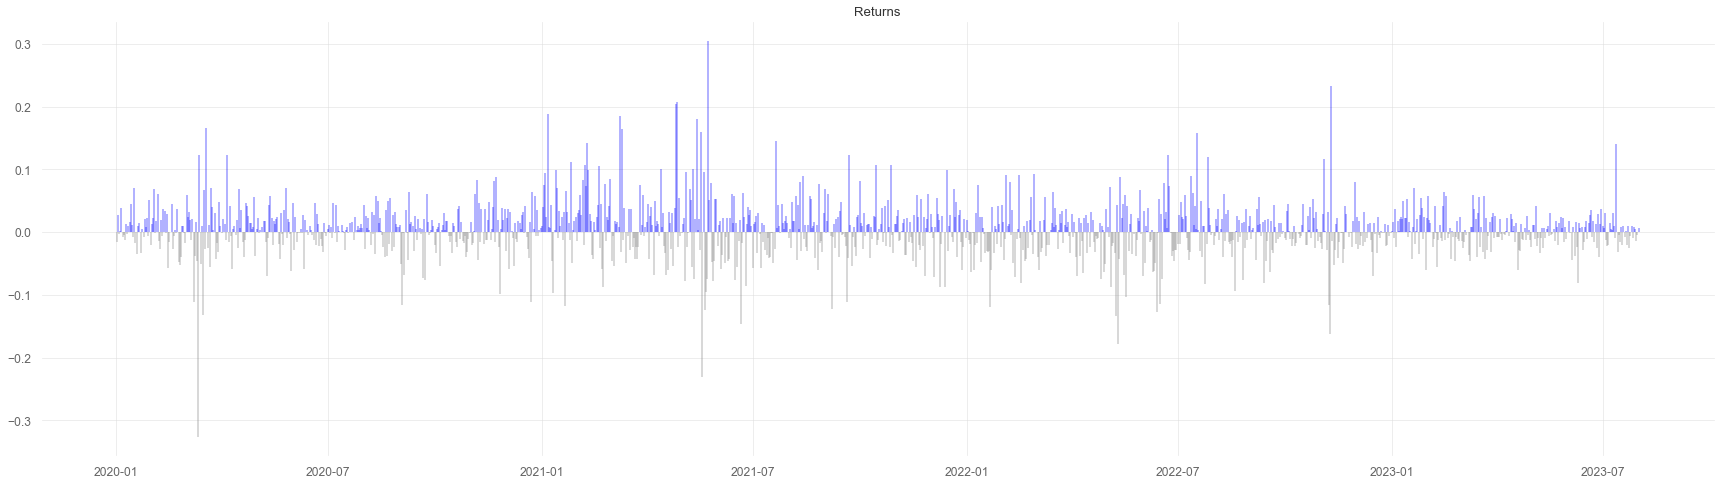

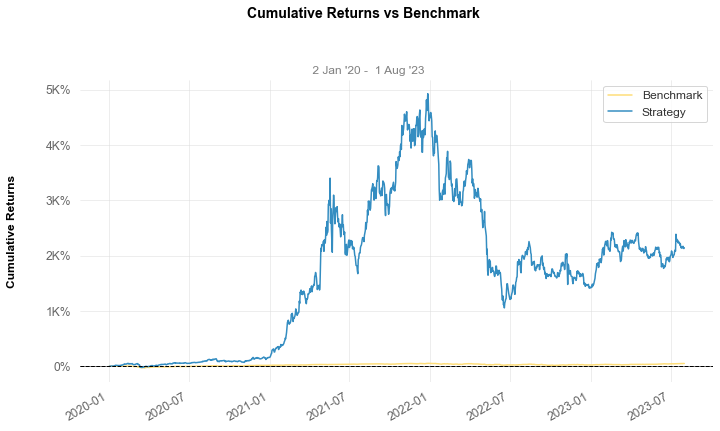

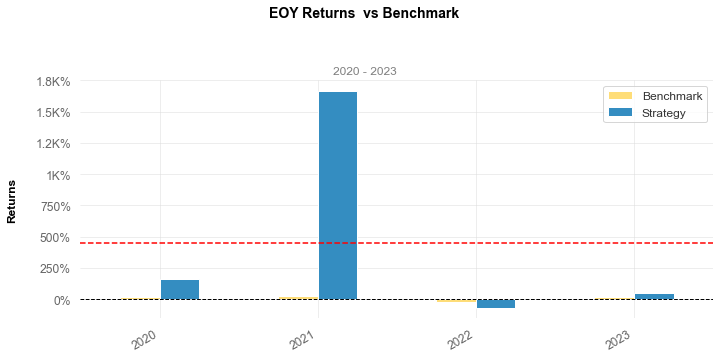

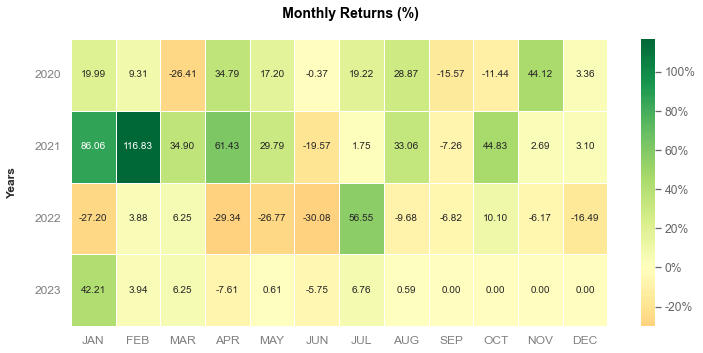

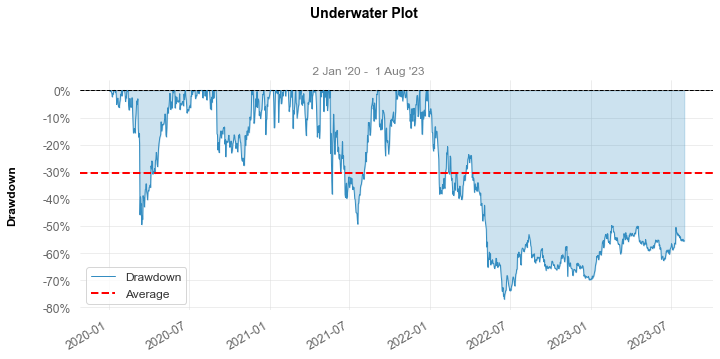

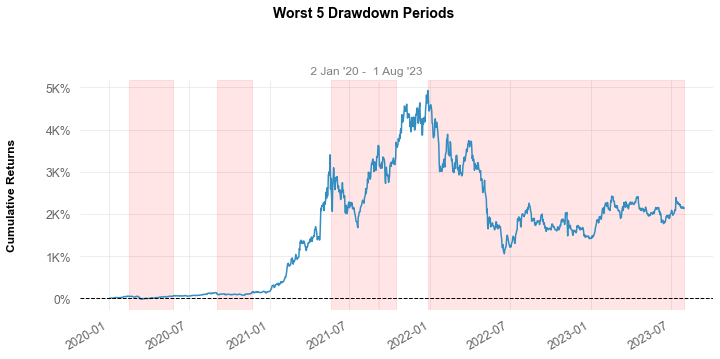

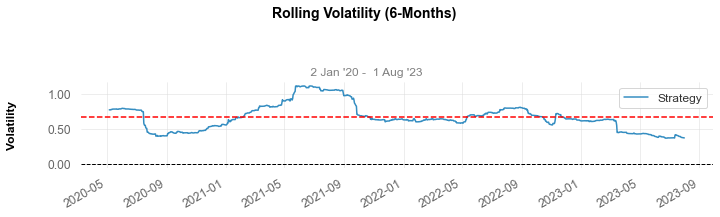

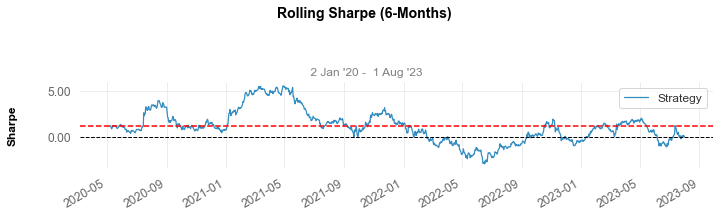

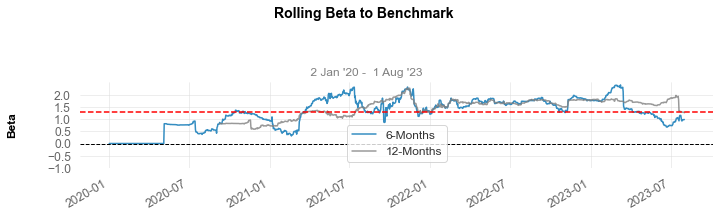

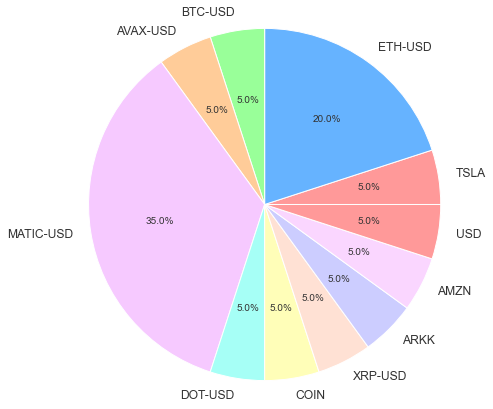

(None, None, None, None, None, None, None, None, None)

In [42]:
portfolio = Engine(
      start_date = "2020-01-01",
      benchmark = ["SPY"], #SPY is set by default
      portfolio = ['TSLA','ETH-USD','BTC-USD','AVAX-USD','MATIC-USD', 'DOT-USD','COIN','XRP-USD','ARKK','AMZN','USD',],
      optimizer = "EF",
      min_weights = 0.05, #invest at least 5% of the capital in every assets
      max_weights = 0.35 #don't invest more than 35% in one asset
)

empyrial(portfolio)

# Pyfolio reloaded playground


In [1]:
# pyfolio reloaded playground

# silence warnings
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
import pyfolio as pf
%matplotlib inline 

In [19]:
tsla = yf.Ticker('TSLA')
spy = yf.Ticker('SPY')
btc = yf.Ticker('BTC-USD')
tickers = [spy, tsla, btc]
history = spy.history('max')
history.index = history.index.tz_localize('utc')

history.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7681 entries, 1993-01-29 00:00:00+00:00 to 2023-08-01 00:00:00+00:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          7681 non-null   float64
 1   High          7681 non-null   float64
 2   Low           7681 non-null   float64
 3   Close         7681 non-null   float64
 4   Volume        7681 non-null   int64  
 5   Dividends     7681 non-null   float64
 6   Stock Splits  7681 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 480.1 KB


In [20]:
returns = history.Close.pct_change()

Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,55.19,2007-10-09,2009-03-09,2012-08-16,1268
1,47.52,2000-03-24,2002-10-09,2006-10-26,1720
2,33.72,2020-02-19,2020-03-23,2020-08-10,124
3,24.50,2022-01-03,2022-10-12,NaT,NaN
4,19.35,2018-09-20,2018-12-24,2019-04-12,147


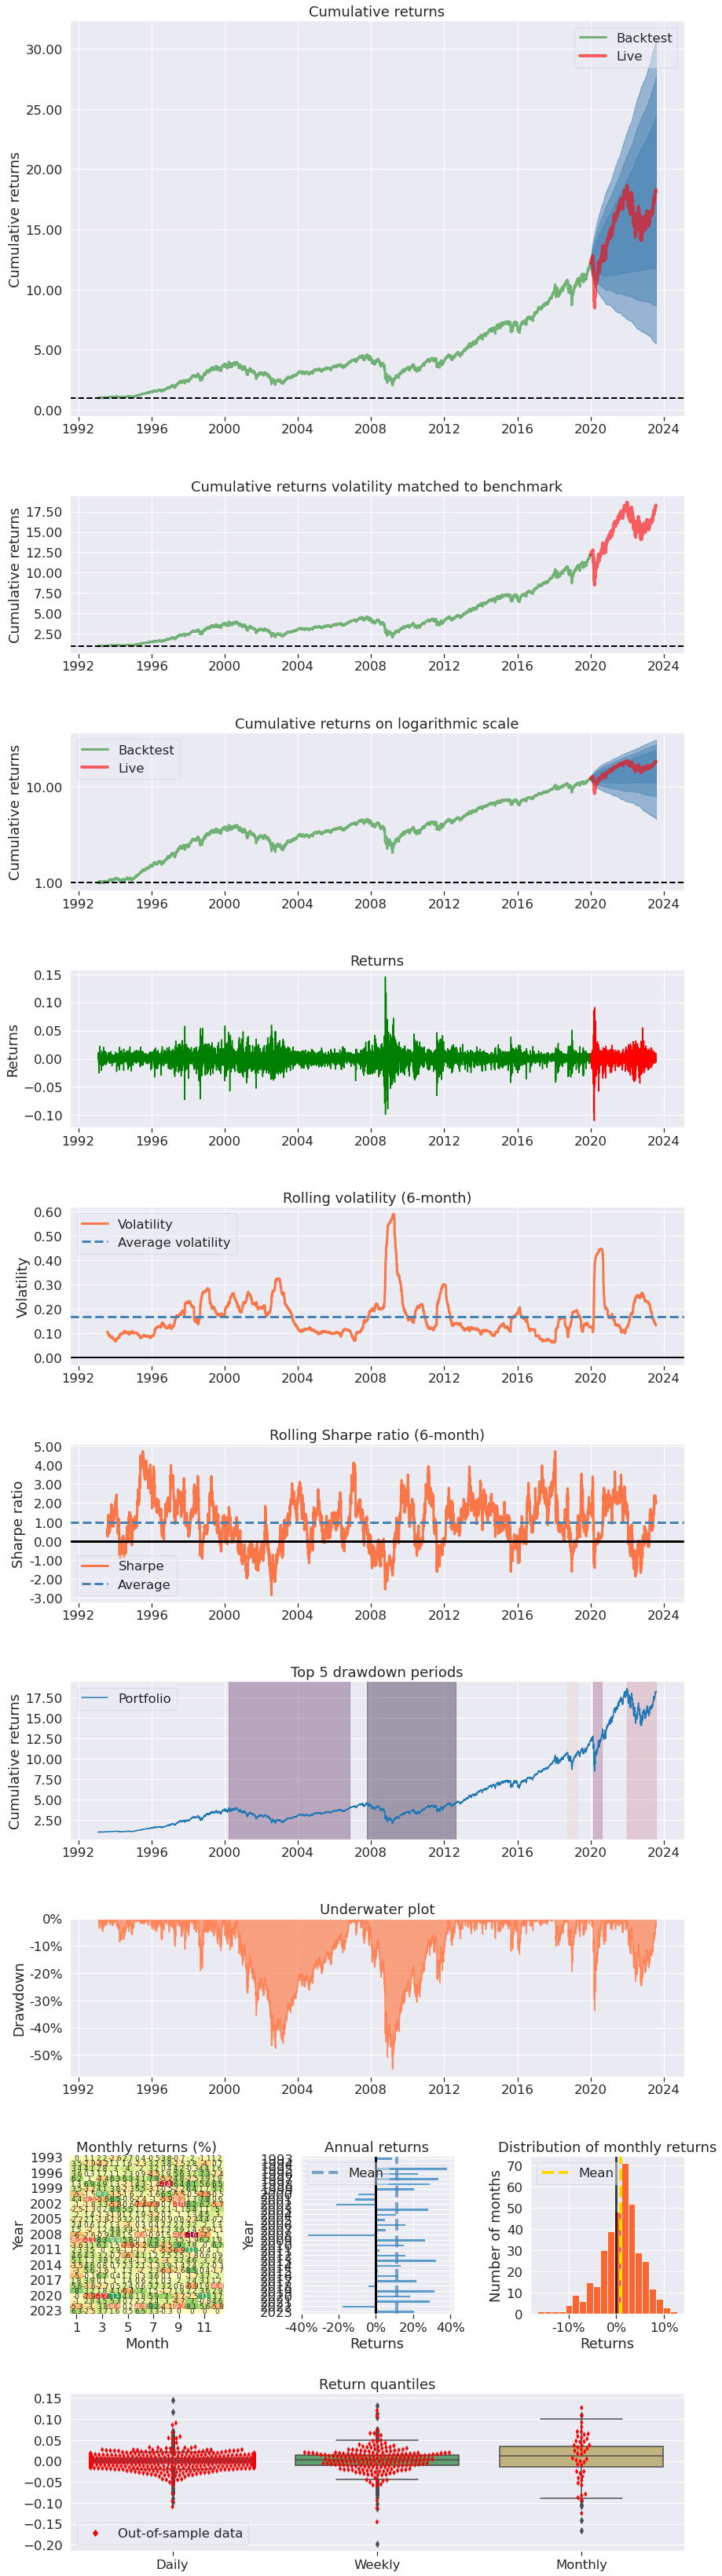

In [21]:
pf.create_returns_tear_sheet(returns, live_start_date='2020-1-1')

In [24]:
import yfinance as yf
import pandas as pd

# Define the tickers
tickers = ['SPY', 'TSLA', 'BTC-USD']


In [25]:
# Collect historical data for all tickers
historical_data = {}
for ticker in tickers:
    historical_data[ticker] = yf.download(ticker, start='2018-01-01', end='2023-06-30')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [26]:

# Combine the historical data into a single DataFrame
portfolio_data = pd.concat(historical_data, axis=1)



In [27]:
# Drop the 'Close' level in the MultiIndex column
portfolio_data.columns = portfolio_data.columns.droplevel()



In [28]:
# Convert the index to UTC timezone
portfolio_data.index = portfolio_data.index.tz_localize('UTC')



In [34]:
# Now you can use pyfolio to analyze the entire portfolio
# For example, you can calculate the portfolio returns using the daily returns
daily_returns = portfolio_data['Close'].pct_change().dropna()


In [35]:
# Convert daily returns Series to a DataFrame
returns_df = pd.DataFrame(daily_returns, columns=['Portfolio'])

ValueError: cannot reindex from a duplicate axis

In [36]:

# Calculate portfolio performance metrics using pyfolio
returns = daily_returns.dropna()
pf.create_full_tear_sheet(returns=returns)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [40]:
import yfinance as yf
import pandas as pd

# Define the tickers
tickers = ['SPY', 'TSLA', 'BTC-USD']

# Collect historical data for all tickers
historical_data = {}
for ticker in tickers:
    data = yf.download(ticker, start='2018-01-01', end='2023-06-30')
    # Rename columns with the ticker symbol as a prefix
    data.columns = [f"{ticker}_{col}" for col in data.columns]
    historical_data[ticker] = data

# Combine the historical data into a single DataFrame
portfolio_data = pd.concat(historical_data.values(), axis=1)

# Convert the index to UTC timezone
portfolio_data.index = portfolio_data.index.tz_localize('UTC')

# Calculate the daily returns of each asset
daily_returns = portfolio_data['TSLA_Close'].pct_change().dropna()

# Convert daily returns Series to a DataFrame
returns_df = pd.DataFrame(daily_returns, columns=['Portfolio'])

# Replace zero returns with a small non-zero value (e.g., 1e-6) to avoid division by zero
returns_df = returns_df.replace(0, 1e-6)

# Calculate portfolio performance metrics using pyfolio
import pyfolio as pf
pf.create_full_tear_sheet(returns=returns_df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


ZeroDivisionError: division by zero